## K-Nearest Neighbor Regression
### Introduction
In this assignment, we are going to experiment the K-Nearest Neighbor (KNN) algorithm on a higher-dimensional dataset and experience the deterioration of prediction performance as the dimensionality grows.

The experiment is built on top of the 3rd-order polynomial model:
$$y = \beta_0 + \beta_1 * x + \beta_2 * x^2 + \beta_3 * x^3 + \epsilon, ~~ \epsilon \sim \text{N}(0, \sigma^2).$$

We first simulate the 3rd-order polynomial datasets

In [1]:
import numpy as np
## population parameters
beta0 = 1
beta1 = -2
beta2 = 6
beta3 = -1
sigma = 2

np.random.seed(7890)

## training data
train_x = np.arange(0, 5, 0.05)
f_x = beta0 + beta1 * train_x + beta2 * train_x**2 + beta3 * train_x**3
epsilon = np.random.normal(loc=0, scale=sigma, size=100)
train_y = f_x + epsilon
train_x = np.expand_dims(train_x, axis = 1)

## test data
test_x = np.arange(0, 5.1, 0.1)
f_x_test = beta0 + beta1 * test_x + beta2 * test_x**2 + beta3 * test_x**3
epsilon_test = np.random.normal(loc=0, scale=sigma, size=len(test_x))
test_y = f_x_test + epsilon_test
test_x = np.expand_dims(test_x, axis = 1)

The resulted training and test dataset have **100** and **51** data points, respectively.

#### 1.	For a fixed $k=15$, fit a KNN model to predict $y$ with $x$, and measure the training and test MSE. 

In [2]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
model = neighbors.KNeighborsRegressor(n_neighbors = 15)
model.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=15)

In [3]:
# Training MSE
mean_squared_error(train_y, model.predict(train_x))
# Test MSE
mean_squared_error(test_y, model.predict(test_x))

5.022177033161812

#### 2.	With the same data, plot the training and test MSE of the KNN model against $k$, and find the optimal $k$ and the corresponding test MSE. 

In [4]:
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(train_x, train_y)  #fit the model
    mse_train[K] = mean_squared_error(train_y, model.predict(train_x))
    mse_test[K] = mean_squared_error(test_y, model.predict(test_x)) 


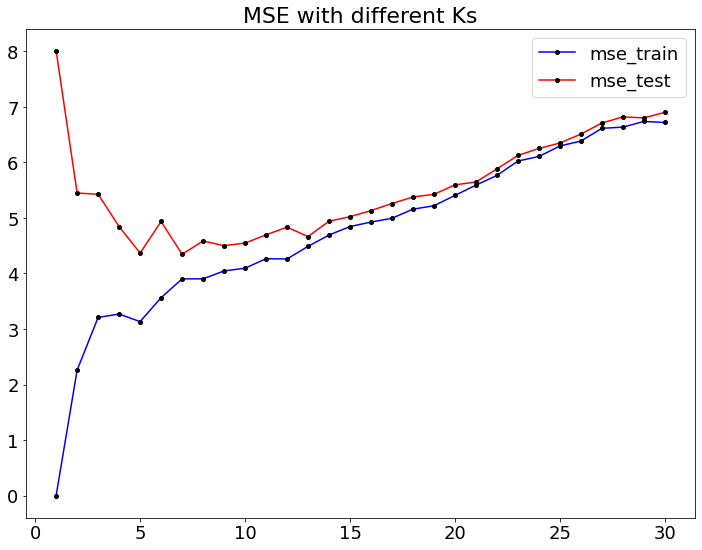

In [5]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [6]:
# optimal k
np.argmin(mse_test)+1

7

In [7]:
# optimal MSE
min(mse_test)

4.345399813791887